In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

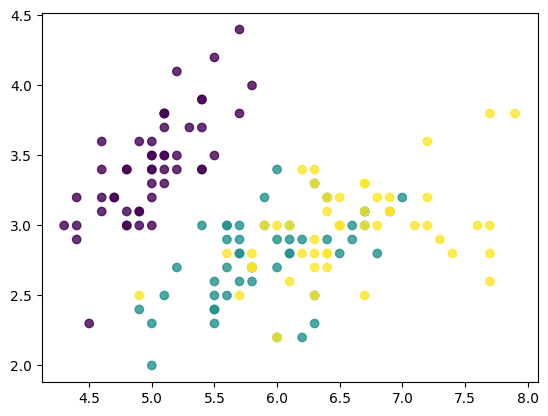

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)
print('Train score :', model.score(X_train, y_train))
print('Test score :', model.score(X_test, y_test))

Train score : 0.95
Test score : 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9416666666666668

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
k = np.arange(1, 50)

param_name = 'n_neighbors'
train_score, val_score = validation_curve(model, X_train, y_train, param_name=param_name, param_range=k, cv=5)

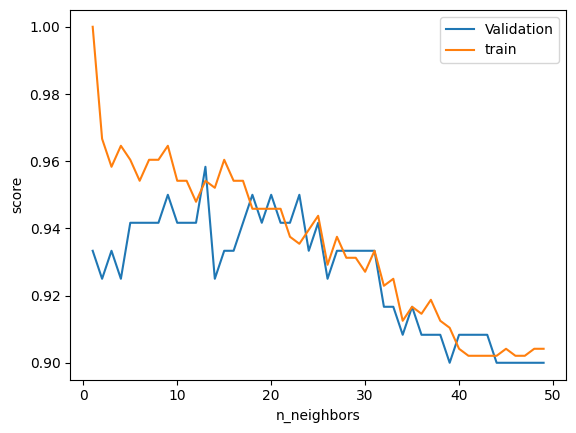

In [ ]:
plt.plot(k, val_score.mean(axis=1), label='Validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# GridSearchCV
Serves to find the model with the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors' : np.arange(1,20),
              'metric' : ['euclidean', 'manhattan']}

In [ ]:
grid = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_score_

0.9583333333333334

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

In [ ]:
model = grid.best_estimator_

In [ ]:
model.score(X_test, y_test)

1.0

# Evaluation with confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, model.predict(X_test))

In [ ]:
import seaborn as sn

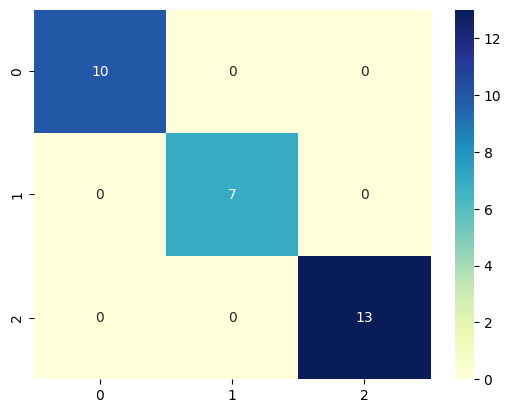

In [ ]:
sn.heatmap(confusion_matrix, cmap="YlGnBu", annot=True)

plt.show()

# Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1, 5), cv=5)

In [ ]:
print(N)

[19 38 57 76 96]


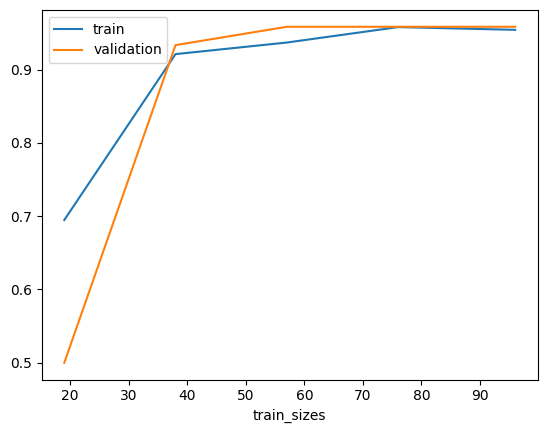

In [ ]:
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()